### Table of Contents
1. [Standardizing depth-maps](#standardizing-depth-maps)
2. [Impact Study for `6.npy`](#impact-study-for-6.npy)
3. [Metric comparison between the generated depth-maps for the given and standardized depth-maps](#metric-comparison-between-the-generated-depth-maps-for-the-given-and-standardized-depth-maps)


## Standardizing depth-maps
* Grayscale
* 8-bit (`uint8`)
* Saved in `.png` format

First, let us standardize the given depth-maps and plot both the provided and standardized sets.

In [1]:
import numpy as np
from rich import print
from pathlib import Path
from matplotlib import pyplot as plt
from PIL import Image

# Local imports
from utils import standardize_intensity, calc_metrics

# `standardize_intensity` is a function that takes a grayscale image and returns a brightness-standardized version of it
# `calc_metrics` is a function that takes a pair of images and returns a dictionary of metrics - NRMSE, SSIM, and PSNR


img_path = Path("./metadata/images/orig")
pngs = [f for f in img_path.glob("*.png")]
npys = [f for f in img_path.glob("*.npy")]

pngs.sort(), npys.sort()

save_path = img_path.parent / "grayscale"
save_path.mkdir(exist_ok=True)

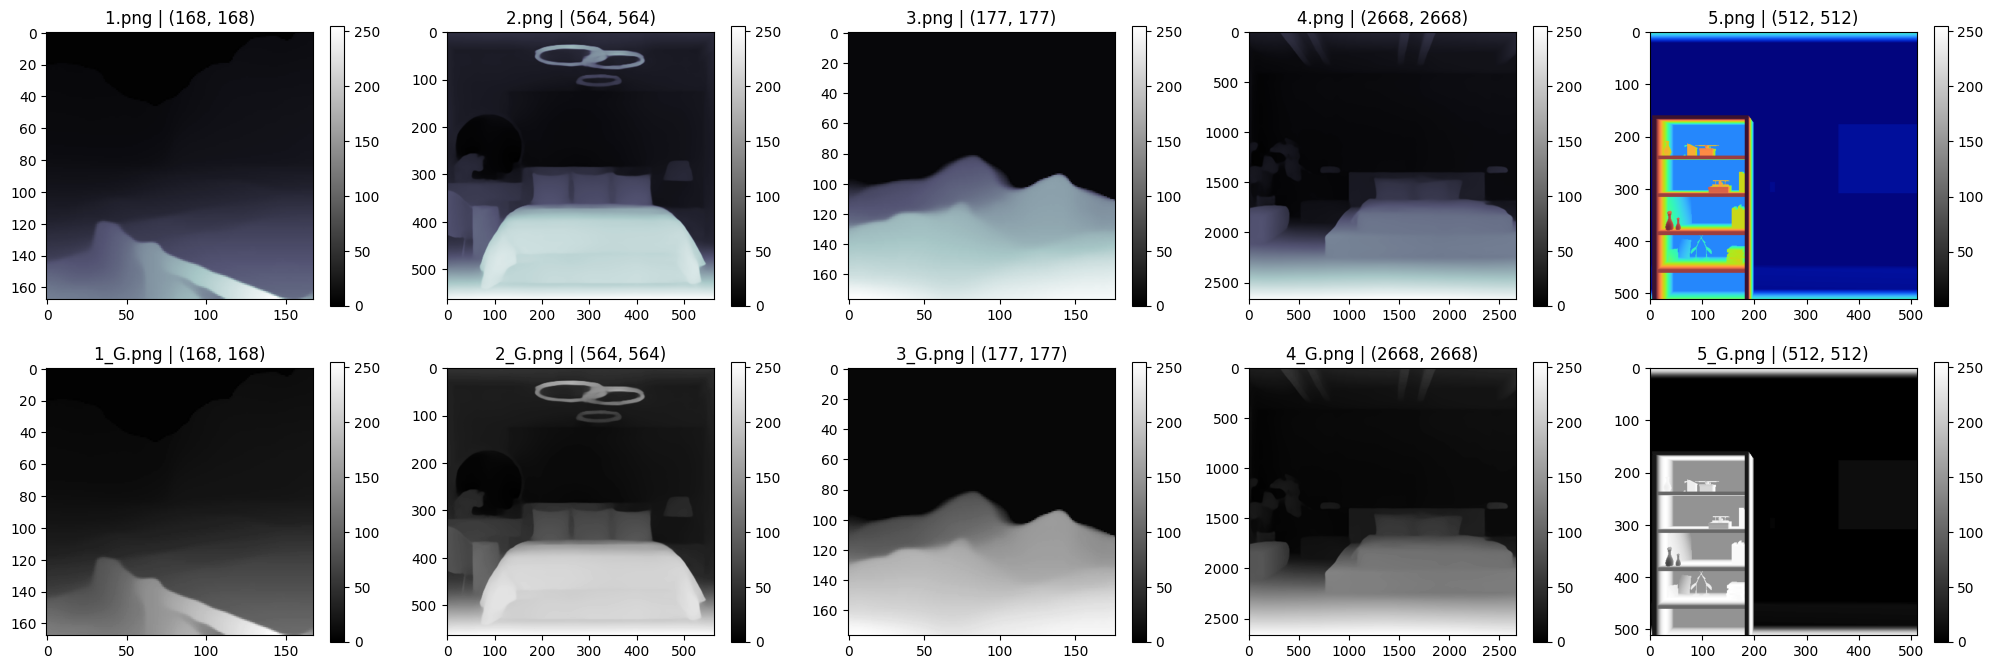

In [2]:
for png in pngs:
    img = Image.open(png)

    # Convert to grayscale
    img = img.convert("L")
    img_np = np.asarray(img)

    # Standardize intensity
    img_np = standardize_intensity(img_np)

    # Save as PNG
    img = Image.fromarray(img_np)
    img.save(save_path / (png.stem + "_G.png"), bits=8, optimize=True)

# Plot the original & grayscale images
fig, axes = plt.subplots(2, len(pngs), figsize=(5 * len(pngs), 8))
plt.set_cmap("gray")

for i in range(len(pngs)):
    image = Image.open(pngs[i])
    axes[0, i].imshow(image, cmap=plt.cm.gray)
    axes[0, i].set_title(f"{i + 1}.png | {image.size}")
    plt.colorbar(axes[0, i].imshow(image))

    image_G = Image.open(save_path / (pngs[i].stem + "_G.png"))
    axes[1, i].imshow(image_G, cmap=plt.cm.gray)
    axes[1, i].set_title(f"{i + 1}_G.png | {image.size}")
    plt.colorbar(axes[1, i].imshow(image_G))

plt.show()

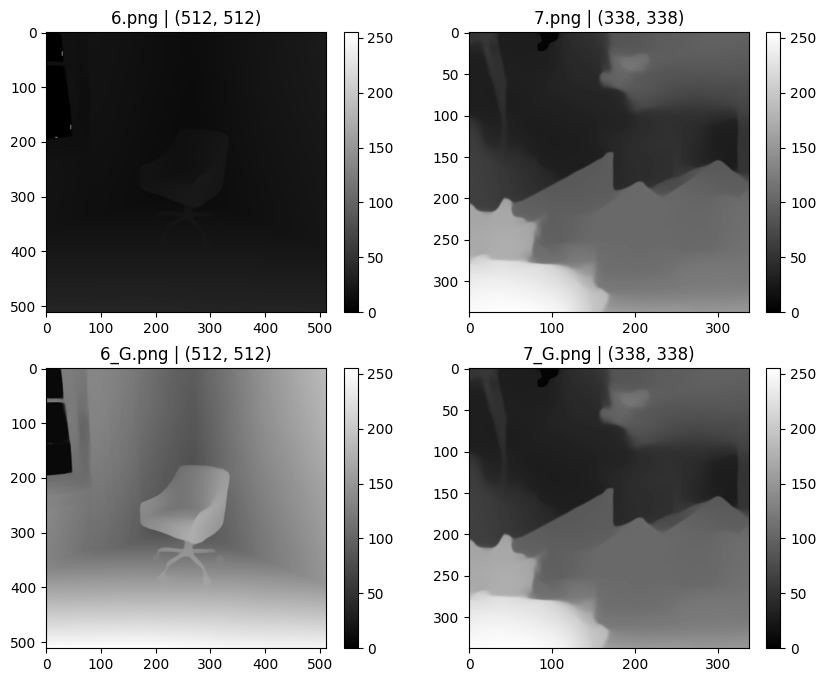

In [3]:
for npy in npys:
    img_np = np.load(npy)  # NOTE: Already in grayscale, but not standardized

    # Save the original (for comparison)
    img_orig = Image.fromarray(img_np.astype(np.uint8))
    img_orig.save(save_path.parent / (npy.stem + ".png"))

    # Standardize intensity
    img_np = standardize_intensity(img_np)

    # Save as PNG
    img = Image.fromarray(img_np)
    img.save(save_path / (npy.stem + "_G.png"), bits=8, optimize=True)

# Plot the original & grayscale images
fig, axes = plt.subplots(2, len(npys), figsize=(5 * len(npys), 8))
plt.set_cmap("gray")

for i in range(len(npys)):
    image = Image.open(save_path.parent / (npys[i].stem + ".png"))
    axes[0, i].imshow(image, cmap=plt.cm.gray)
    axes[0, i].set_title(f"{i + 5 + 1}.png | {image.size}")
    plt.colorbar(axes[0, i].imshow(image))

    image_G = Image.open(save_path / (npys[i].stem + "_G.png"))
    axes[1, i].imshow(image_G, cmap=plt.cm.gray)
    axes[1, i].set_title(f"{i + 5 + 1}_G.png | {image.size}")
    plt.colorbar(axes[1, i].imshow(image_G))


plt.show()

It is clear that the original images (top) are not all in grayscale (some have extra channels), have varying bit-depths, and especially, for "6.npy", the brightness is very low. We standardize the images by converting them to grayscale, and rescaling the brightness, and also study the impact of this process on "6.npy".

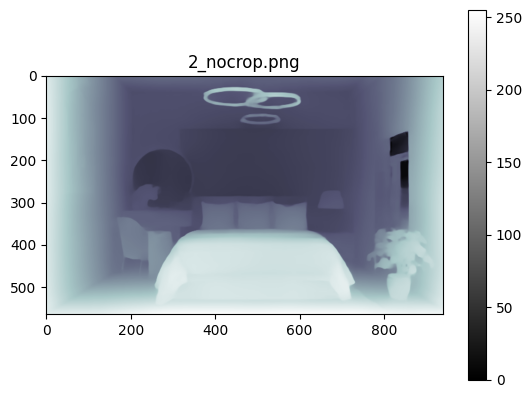

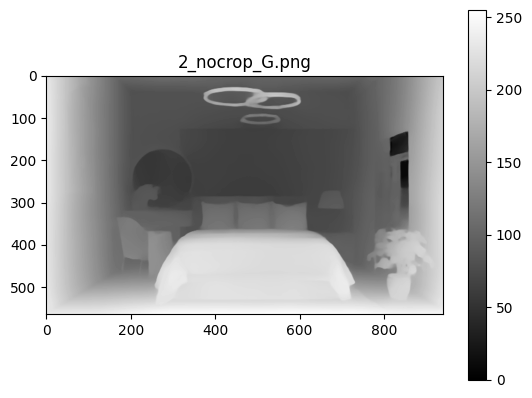

In [4]:
# Doing the same as above for "2_nocrop.png"
img = Image.open(img_path / "no-crop/2_nocrop.png")

plt.imshow(img, cmap=plt.cm.gray)
plt.title("2_nocrop.png")
plt.colorbar()
plt.show()

img = img.convert("L")

img_np = np.asarray(img)
img_np = standardize_intensity(img_np)

img_2 = Image.fromarray(img_np)
img_2.save(save_path / "2_nocrop_G.png")

plt.imshow(img_2, cmap=plt.cm.gray)
plt.title("2_nocrop_G.png")
plt.colorbar()
plt.show()

## Impact Study for `6.npy`
Here, we visually compare the generated images and depth-maps for the provided and standardized depth-maps. After this, we provide some quantitative analysis, using Mean Squared Error (MSE), Peak Signal-to-Noise Ratio (PSNR), and Structural Similarity Index Measure (SSIM) scores. The associated ComfyUI workflow is available [here](./workflows/0_standardize/0_standardize_workflow.json) (`./workflows/0_standardize/0_standardize_workflow.json`).

<h4>ComfyUI Workflows (No Standardization vs Standardization)</h4>
<img src="./workflows/0_standardize/no_std_comfy.png" width="80%" alt="ComfyUI Workflow with >NO< Standardization">
<img src="./workflows/0_standardize/std_comfy.png" width="80%" alt="ComfyUI Workflow with Standardization">


In [5]:
# import jupyter_compare_view

In [6]:
# Depth-Maps
res_path = Path("./results/0_standardize/")

no_std_dms = [f for f in res_path.glob("no_std_*")]
std_dms = [f for f in res_path.glob("std_*")]

no_std_dms.sort(), std_dms.sort()
no_std_dms, std_dms

([PosixPath('results/0_standardize/no_std_base_depthmap.png'),
  PosixPath('results/0_standardize/no_std_depth_1.png'),
  PosixPath('results/0_standardize/no_std_depth_2.png'),
  PosixPath('results/0_standardize/no_std_depth_3.png'),
  PosixPath('results/0_standardize/no_std_gen.png')],
 [PosixPath('results/0_standardize/std_base_depthmap.png'),
  PosixPath('results/0_standardize/std_depth_1.png'),
  PosixPath('results/0_standardize/std_depth_2.png'),
  PosixPath('results/0_standardize/std_depth_3.png'),
  PosixPath('results/0_standardize/std_gen.png')])

In [7]:
base_dms = no_std_dms[0], std_dms[0]
gen_imgs = no_std_dms[-1], std_dms[-1]
dms = no_std_dms[1:-1], std_dms[1:-1]
no_stds, stds = dms[0], dms[1]

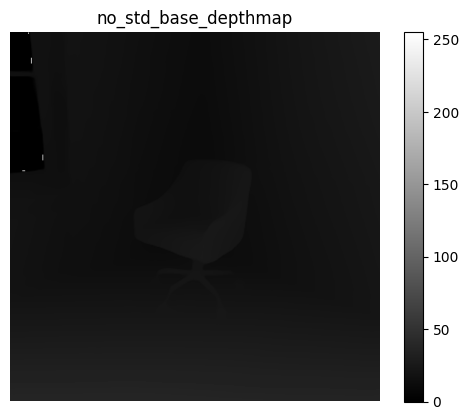

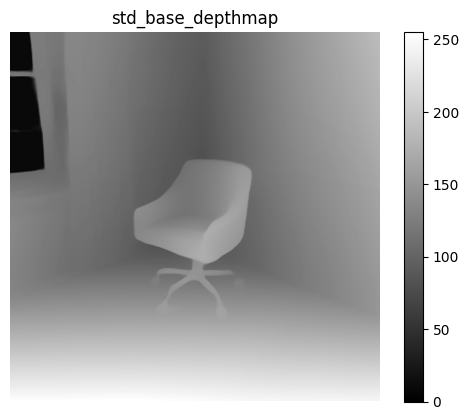

In [8]:
# %%compare --config '{"start_mode": "horizontal"}'

# Base Depth-Maps
for i in base_dms:
    img = Image.open(i)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title(i.stem)
    plt.colorbar()
    plt.axis("off")
    plt.show()

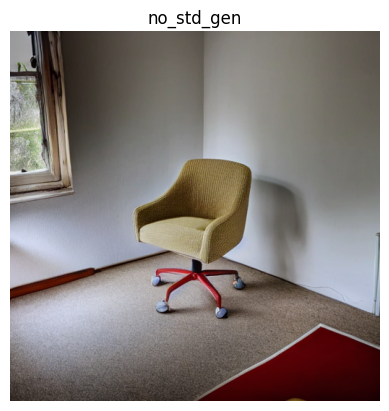

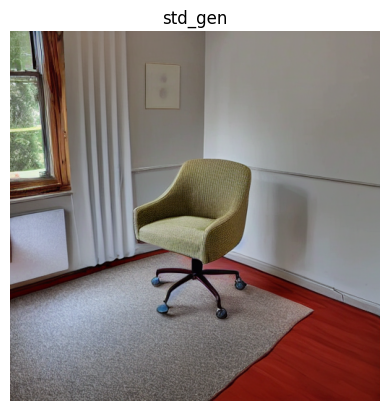

In [9]:
# %%compare --config '{"start_mode": "horizontal"}'

# Generated Images
for i in gen_imgs:
    img = Image.open(i)
    plt.imshow(img)
    plt.title(i.stem)
    plt.axis("off")
    plt.show()

Comparing the depth-maps, created using the generated image

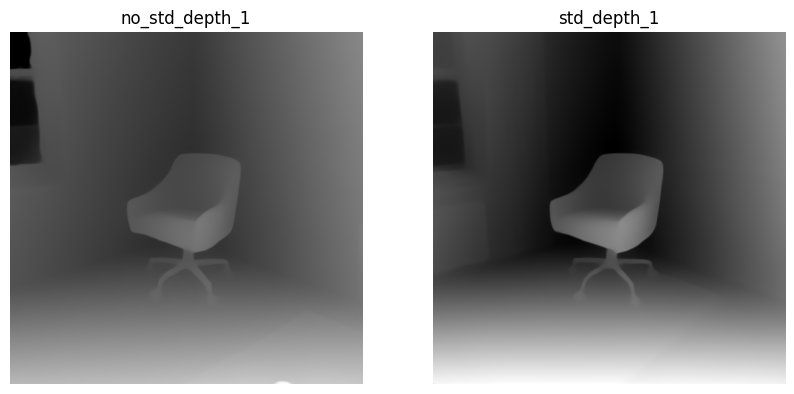

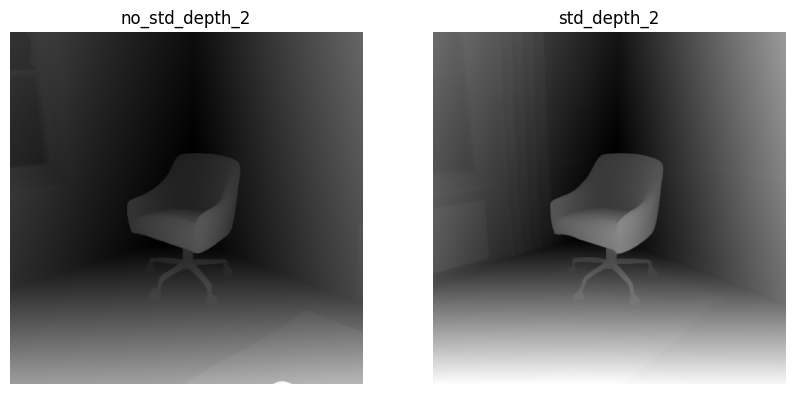

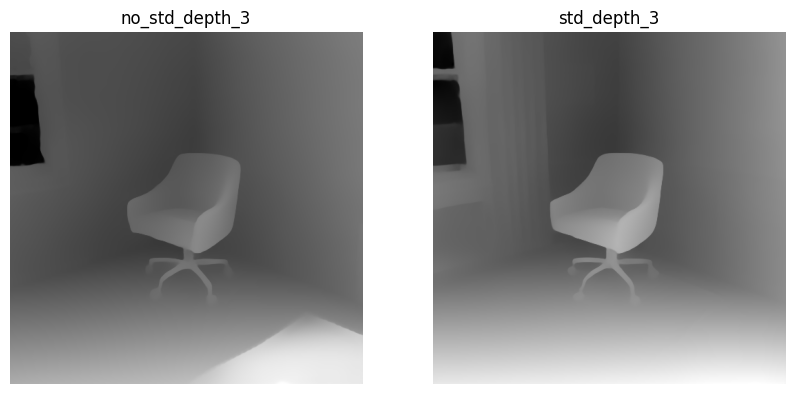

In [10]:
for i, j in zip(*dms):
    img_no_std = Image.open(i)
    img_std = Image.open(j)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img_no_std, cmap=plt.cm.gray)
    axes[0].set_title(i.stem)
    axes[0].axis("off")
    # plt.colorbar(axes[0].imshow(img_no_std))

    axes[1].imshow(img_std, cmap=plt.cm.gray)
    axes[1].set_title(j.stem)
    axes[1].axis("off")
    # plt.colorbar(axes[1].imshow(img_no_std))

    plt.show()

## Metric comparison between the generated depth-maps for the given and standardized depth-maps
* NRMSE
* PSNR
* SSIM

In [11]:
no_std_base, std_base = base_dms
print(no_std_base, no_stds, std_base, stds)

no_std_base, std_base = Image.open(no_std_base), Image.open(std_base)

no_std_depth_1 = Image.open(no_stds[0])  # DepthAnything
no_std_depth_2 = Image.open(no_stds[1])  # DepthAnything v2
no_std_depth_3 = Image.open(no_stds[2])  # MiDaS

std_depth_1 = Image.open(stds[0])  # DepthAnything
std_depth_2 = Image.open(stds[1])  # DepthAnything v2
std_depth_3 = Image.open(stds[2])  # MiDaS

results/0_standardize/no_std_base_depthmap.png
[
    PosixPath('results/0_standardize/no_std_depth_1.png'),
    PosixPath('results/0_standardize/no_std_depth_2.png'),
    PosixPath('results/0_standardize/no_std_depth_3.png')
]
results/0_standardize/std_base_depthmap.png
[
    PosixPath('results/0_standardize/std_depth_1.png'),
    PosixPath('results/0_standardize/std_depth_2.png'),
    PosixPath('results/0_standardize/std_depth_3.png')
]

In [12]:
print(
    "Comparing [orange3]provided[/] depth-map with those created from the corresponding generated image (DA, DAv2, MiDaS):\n",
    calc_metrics(no_std_base, no_std_depth_1),
    calc_metrics(no_std_base, no_std_depth_2),
    calc_metrics(no_std_base, no_std_depth_3),
)

Comparing provided depth-map with those created from the corresponding generated image (DA, DAv2, MiDaS):

{'NRMSE': 3.919341616376011, 'SSIM': 0.3894580856007938, 'PSNR': 9.858526055439361}
{'NRMSE': 2.5136867901732396, 'SSIM': 0.6367899115303575, 'PSNR': 13.716565177492782}
{'NRMSE': 4.336735538187974, 'SSIM': 0.3677112387170873, 'PSNR': 8.979529656482752}

In [13]:
print(
    "Comparing [green]standardized[/] depth-map with those created from the corresponding generated image (DA, DAv2, MiDaS):\n",
    calc_metrics(std_base, std_depth_1),
    calc_metrics(std_base, std_depth_2),
    calc_metrics(std_base, std_depth_3),
)

Comparing standardized depth-map with those created from the corresponding generated image (DA, DAv2, MiDaS):

{'NRMSE': 0.39844936647708723, 'SSIM': 0.7505601552428934, 'PSNR': 12.726918699599247}
{'NRMSE': 0.36212047751632065, 'SSIM': 0.7898744873698749, 'PSNR': 13.557319824750893}
{'NRMSE': 0.15207822190110323, 'SSIM': 0.9542839725829545, 'PSNR': 21.093040990222413}

In [14]:
# Table of metrics
from rich.table import Table

table = Table(title="Quantitative Metrics", padding=(0, 0))
table.add_column("Metric", justify="center", style="dark_magenta")
table.add_column("6.png (Given)", justify="center", style="orange3")
table.add_column("6_G.png (Standardized)", justify="center", style="green")

# Chosen metrics
metrics = Table(show_edge=False)

for i in ["NRMSE ↓", "SSIM ↑", "PSNR ↑"]:
    metrics.add_row(i)


# 6.png (Given)
_6 = Table(show_edge=False)
_6.add_column("DepthAnything", justify="center")
_6.add_column("DepthAnything v2", justify="center")
_6.add_column("MiDaS", justify="center")
_6.add_row(
    *[
        f"{calc_metrics(no_std_base, no_std_depth)['NRMSE']:.4f}"
        for no_std_depth in (no_std_depth_1, no_std_depth_2, no_std_depth_3)
    ],
)
_6.add_row(
    *[
        f"{calc_metrics(no_std_base, no_std_depth)['SSIM']:.4f}"
        for no_std_depth in (no_std_depth_1, no_std_depth_2, no_std_depth_3)
    ],
)
_6.add_row(
    *[
        f"{calc_metrics(no_std_base, no_std_depth)['PSNR']:.4f}"
        for no_std_depth in (no_std_depth_1, no_std_depth_2, no_std_depth_3)
    ],
)
# 6_G.png (Standardized)
_6g = Table(show_edge=False)
_6g.add_column("DepthAnything", justify="center")
_6g.add_column("DepthAnything v2", justify="center")
_6g.add_column("MiDaS", justify="center")
_6g.add_row(
    *[
        f"{calc_metrics(std_base, std_depth)['NRMSE']:.4f}"
        for std_depth in (std_depth_1, std_depth_2, std_depth_3)
    ],
)
_6g.add_row(
    *[
        f"{calc_metrics(std_base, std_depth)['SSIM']:.4f}"
        for std_depth in (std_depth_1, std_depth_2, std_depth_3)
    ],
)
_6g.add_row(
    *[
        f"{calc_metrics(std_base, std_depth)['PSNR']:.4f}"
        for std_depth in (std_depth_1, std_depth_2, std_depth_3)
    ],
)

table.add_row(metrics, _6, _6g)
table

                                        Quantitative Metrics                                        
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric  ┃               6.png (Given)               ┃           6_G.png (Standardized)           ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         │ DepthAnything ┃ DepthAnything v2 ┃ MiDaS  │ DepthAnything ┃ DepthAnything v2 ┃  MiDaS  │
│━━━━━━━━━│━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━│━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━│
│ NRMSE ↓ │    3.9193     │      2.5137      │ 4.3367 │    0.3984     │      0.3621      │ 0.1521  │
│ SSIM ↑  │    0.3895     │      0.6368      │ 0.3677 │    0.7506     │      0.7899      │ 0.9543  │
│ PSNR ↑  │    9.8585     │     13.7166      │ 8.9795 │    12.7269    │     13.5573      │ 21.0930 │
└─────────┴───────────────────────────────────────────┴────────────────────────────────────────────┘

Except for a single PSNR value that is lower than that for the base depthmap, all other comparisons heavily favour the standardized depth-map. Adding on to the qualitative comparison, it is evident that the standardized depth-maps are better suited for capturing subtle details and therefore, are more suitable for the downstream generation task, particularly in cases like "6.npy".